<a href="https://colab.research.google.com/github/matbmotta/analise_dados_fifa/blob/main/Dados_Fifa_K_Means_com_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizado de Máquina Não Supervisionado - K Means com PCA E Agrupamento**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar salários de jogadores


Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/datasets/blurredmachine/fifa-2019-world-cup-dataset 

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
df = pd.read_csv('/content/drive/MyDrive/DataScienceUP/FIFA_data.csv',
                    sep=',', encoding='iso-8859-1')

In [43]:
df.head()

,ï»¿,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M


**ATRIBUTOS:** 

ID: identificação do jogador.

Name: Nome.

Age: idade.

Nationality:	Nacionalidade.

Overall: Habilidades.

Potential: Potencial

Wage: Salário

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [44]:
df.head(2)

,ï»¿,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M


In [45]:
df.rename(columns={'ID': 'identificacao'}, inplace=True)
df.rename(columns={'Name': 'nome'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)
df.rename(columns={'Nationality': 'nacionalidade'}, inplace=True)
df.rename(columns={'Overall': 'Habilidades'}, inplace=True)
df.rename(columns={'Overall': 'Habilidades'}, inplace=True)
df.rename(columns={'Potential': 'potencial'}, inplace=True)
df.rename(columns={'Wage': 'salario'}, inplace=True)


In [46]:
df = df.drop(columns=['ï»¿','Photo', 'Flag', 'Club', 'Club Logo', 'Value', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',	'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',	'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW' , 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 	'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina',	'Strength', 'LongShots', 	'Aggression', 	'Interceptions', 'Positioning', 	'Vision', 'Penalties', 'Composure',	'Marking', 'StandingTackle', 'SlidingTackle',	'GKDiving', 'GKHandling', 'GKKicking',	'GKPositioning', 'GKReflexes', 'Release Clause', 'Special'])

In [88]:
df['salario'] = df['salario'].str.replace('â¬','')
df['salario'] = df['salario'].str.replace('K','')

In [100]:
df['salario'] = df['salario'].astype(float)*1000

In [101]:
df.head(3)

,identificacao,nome,idade,nacionalidade,Habilidades,potencial,salario
0,158023,L. Messi,31,Argentina,94,94,565000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,405000.0
2,190871,Neymar Jr,26,Brazil,92,93,290000.0


**Valores Missing (NAN)**

In [102]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

identificacao    0
nome             0
idade            0
nacionalidade    0
Habilidades      0
potencial        0
salario          0
dtype: int64

**Análise dos tipos de atributos.**

In [103]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

identificacao      int64
nome              object
idade              int64
nacionalidade     object
Habilidades        int64
potencial          int64
salario          float64
dtype: object

**Dados Estatísticos**

In [104]:
df.describe()

,identificacao,idade,Habilidades,potencial,salario
count,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000
mean,214296.582555,25.122707,66.239811,71.307591,9731.791717
std,29965.130308,4.669582,6.907491,6.136538,21999.799429
min,16.000000,16.000000,47.000000,48.000000,0.000000
25%,200315.250000,21.000000,62.000000,67.000000,1000.000000
50%,221757.500000,25.000000,66.000000,71.000000,3000.000000
75%,236528.500000,28.000000,71.000000,75.000000,9000.000000
max,246620.000000,45.000000,94.000000,95.000000,565000.000000


**Análise dos outliers**

In [105]:
import plotly.express as px

In [106]:
boxplot = px.box(df, y="salario")
boxplot.show()

In [107]:
boxplot = px.box(df, y="idade")
boxplot.show()

## **PRÉ-PROCESSAMENTO**

In [108]:
df.head(2)

,identificacao,nome,idade,nacionalidade,Habilidades,potencial,salario
0,158023,L. Messi,31,Argentina,94,94,565000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,405000.0


###**Excluir identificação dos jogadores**

In [109]:
df2 = df.drop(columns = ['nacionalidade', 'nome'] , axis = 1)

In [110]:
df2.head(2)

,identificacao,idade,Habilidades,potencial,salario
0,158023,31,94,94,565000.0
1,20801,33,94,94,405000.0


###**Escalonamento**

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [ ]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## **K Means com PCA**

In [114]:
df2_esc

array([[-1.87802047,  1.25866838,  4.01896319,  3.69801868, 25.24038732],
       [-6.45753564,  1.68698405,  4.01896319,  3.69801868, 17.967394  ],
       [-0.78178288,  0.18787921,  3.7294145 ,  3.53505587, 12.73993005],
       ...,
       [ 0.96342682, -1.31122562, -2.78543105, -1.35382833, -0.39691414],
       [ 0.91246619, -1.95369913, -2.78543105, -0.7019771 , -0.39691414],
       [ 1.06698336, -1.73954129, -2.78543105, -0.86493991, -0.39691414]])

In [115]:
df2_esc.shape

(18206, 5)

**Componentes Principais**

In [116]:
from sklearn.decomposition import PCA

In [117]:
pca = PCA(n_components = 2)

In [118]:
df2_pca = pca.fit_transform(df2_esc)

In [119]:
df2_pca

array([[16.30637332,  8.50480297],
       [15.14668088,  4.0003963 ],
       [ 9.55392251,  5.8710088 ],
       ...,
       [-3.20079013, -0.14382274],
       [-3.20713711,  0.58186909],
       [-3.24515312,  0.43695353]])

In [120]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.48570657, 0.33739982])

In [121]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.8231063923514528

**Elbow Method**

In [122]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

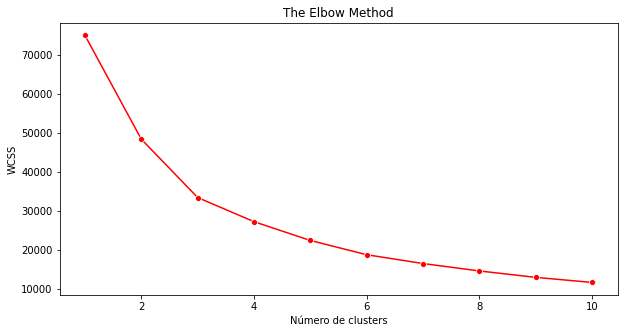

In [124]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [125]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [126]:
kmeans_fit = kmeans.fit(df2_pca)

In [127]:
# Coordenadas dos Centróides
centroides = kmeans_fit.cluster_centers_
centroides

array([[ 0.06968381,  0.95246358],
       [ 2.93426399,  1.15302777],
       [ 0.63643014, -1.34850947],
       [-1.52791329,  0.12697989]])

In [128]:
# Classificação dos dados
classificacao = kmeans_fit.labels_
classificacao

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [129]:
classificacao[2]

1

In [130]:
import plotly.express as px
import plotly.graph_objects as go

In [131]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [132]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,1
1,1
2,1
3,1
4,1
...,...
18201,3
18202,3
18203,3
18204,3


In [133]:
df = pd.concat([df, agrupamento],axis=1)
df

,identificacao,nome,idade,nacionalidade,Habilidades,potencial,salario,Grupo
0,158023,L. Messi,31,Argentina,94,94,565000.0,1
1,20801,Cristiano Ronaldo,33,Portugal,94,94,405000.0,1
2,190871,Neymar Jr,26,Brazil,92,93,290000.0,1
3,193080,De Gea,27,Spain,91,93,260000.0,1
4,192985,K. De Bruyne,27,Belgium,91,92,355000.0,1
...,...,...,...,...,...,...,...,...
18201,243413,D. Walsh,18,Republic of Ireland,47,68,1000.0,3
18202,238813,J. Lundstram,19,England,47,65,1000.0,3
18203,243165,N. Christoffersson,19,Sweden,47,63,1000.0,3
18204,241638,B. Worman,16,England,47,67,1000.0,3


In [134]:
df.iloc[125 , :]

identificacao            200104
nome                     H. Son
idade                        25
nacionalidade    Korea Republic
Habilidades                  84
potencial                    85
salario                125000.0
Grupo                         1
Name: 125, dtype: object

In [135]:
grupo0 = df.loc[df.Grupo == 0]
grupo0 

,identificacao,nome,idade,nacionalidade,Habilidades,potencial,salario,Grupo
555,244369,V. Tsygankov,20,Ukraine,79,86,1000.0,0
556,239818,RÃºben Dias,21,Portugal,79,85,10000.0,0
558,233419,Raphinha,21,Brazil,79,86,13000.0,0
568,229909,A. Lunev,26,Russia,79,81,0.0,0
574,225997,B. VerbiÄ,24,Slovenia,79,81,1000.0,0
...,...,...,...,...,...,...,...,...
16005,243810,L. Ingolotti,18,Argentina,58,80,1000.0,0
16028,244592,J. von Moos,17,Switzerland,58,84,2000.0,0
16092,241046,J. Romero,17,Argentina,58,81,1000.0,0
16099,242841,A. Appiah,17,England,58,81,4000.0,0


In [136]:
grupo0.shape

(5062, 8)